# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [22]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

def loadTrafficSignData():

    training_file = 'train.p'
    testing_file = 'test.p'

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    X_train, y_train = train['features'], train['labels']
    X_test, y_test = test['features'], test['labels']
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = loadTrafficSignData()
    
print("Done")

Done


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [23]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
classes = []
for feat in y_train:
    if feat not in classes:
        classes.append(feat)
        
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

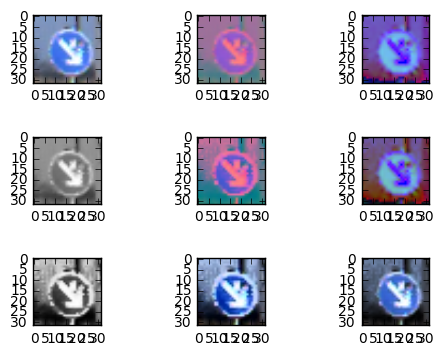

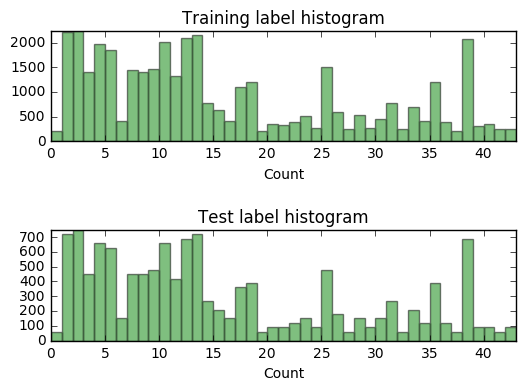

Done.


In [24]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
import numpy as np
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

# Test image chosen randomly
random_sign = 37898
image = X_train[random_sign]

# Create a plot
fig = plt.figure()
fig.subplots_adjust(hspace = 0.8)
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

ax1.imshow(image)

# Create high contrast grayscale, HSV and YUV images
image_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
ax2.imshow(image_yuv)

image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])
ax5.imshow(image_yuv)

image_yuv = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
ax8.imshow(image_yuv)

image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
ax3.imshow(image_hsv)

image_hsv[:,:,2] = cv2.equalizeHist(image_hsv[:,:,2])
ax6.imshow(image_hsv)

image_hsv = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
ax9.imshow(image_hsv)

image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ax4.imshow(cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB))

image_gray = cv2.equalizeHist(image_gray[:,:])
image_gray = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB)
ax7.imshow(image_gray)

###

# Histogram the data with bins determined by classifications
bins = np.linspace(0, (n_classes), num=(n_classes+1))
n_train_hist = np.histogram(y_train, bins)[0] # only care about first returned value
n_test_hist = np.histogram(y_test, bins)[0] # only care about first returned value

def getBarPath(hist,bins):
    '''http://matplotlib.org/examples/animation/histogram.html'''
    N = len(bins)-1

    left = np.array(bins[:-1])
    right = np.array(bins[1:])
    bottom = np.zeros(len(left))
    top = bottom + hist

    nverts = N*(1 + 3 + 1)
    verts = np.zeros((nverts, 2))
    codes = np.ones(nverts, int) * path.Path.LINETO
    codes[0::5] = path.Path.MOVETO
    codes[4::5] = path.Path.CLOSEPOLY
    verts[0::5, 0] = left
    verts[0::5, 1] = bottom
    verts[1::5, 0] = left
    verts[1::5, 1] = top
    verts[2::5, 0] = right
    verts[2::5, 1] = top
    verts[3::5, 0] = right
    verts[3::5, 1] = bottom

    return path.Path(verts, codes), left, right, bottom, top

fig2 = plt.figure()
fig2.subplots_adjust(hspace = 0.8)
ax1 = fig2.add_subplot(211)
ax2 = fig2.add_subplot(212)

barpath, left, right, bottom, top = getBarPath(n_train_hist,bins)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='black', alpha=0.5)

ax1.add_patch(patch)
ax1.set_xlim(left[0], right[-1])
ax1.set_ylim(bottom.min(), n_train_hist.max())
ax1.set_title('Training label histogram')
ax1.set_xlabel('Label')
ax1.set_xlabel('Count') 

barpath, left, right, bottom, top = getBarPath(n_test_hist,bins)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='black', alpha=0.5)

ax2.add_patch(patch)
ax2.set_xlim(left[0], right[-1])
ax2.set_ylim(bottom.min(), n_test_hist.max())
ax2.set_title('Test label histogram')
ax2.set_xlabel('Label')
ax2.set_xlabel('Count') 

plt.show()

###


print("Done.")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Done!


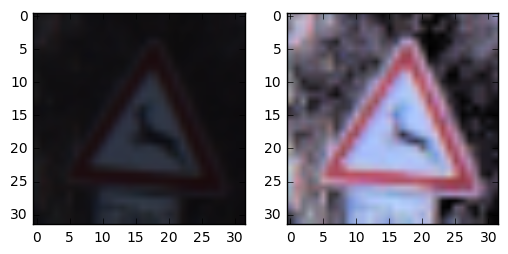

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import matplotlib.colors

# Reload data as it is overwritten further on
X_train, y_train, X_test, y_test = loadTrafficSignData()

# Preprocessing routines
def imagePreProcess(image, contrast_method = 'HSV'):
   
    # maximize contrast
    if contrast_method is 'HSV':
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        image[:,:,2] = cv2.equalizeHist(image[:,:,2]) # 2nd pixel coordinate is "value"
        image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
    elif contrast_method is 'YUV':
        image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        image[:,:,0] = cv2.equalizeHist(image[:,:,0]) # 0th pixel coordinate is "luma"
        image = cv2.cvtColor(image, cv2.COLOR_YUV2RGB)
    elif contrast_method is 'GRAY':
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image[:,:] = cv2.equalizeHist(image[:,:])
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    
    return image
        
# Normalize data, set mean values to 0
def imageNormalize(image):
    image= image/255 - 0.5
                
    return image
    

# Hyper-Parameters
CONTRAST_METHOD = 'HSV'

# Pre-processing method test code
image_index = 3361 # any random index in range
image = X_test[image_index]
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.imshow(image)
image = imagePreProcess(image, contrast_method = CONTRAST_METHOD)
ax2.imshow(image)

# Pre-process training and testing data
# Use temp variables with datatype float32
training_set = np.zeros_like(X_train, dtype = np.float32)
testing_set = np.zeros_like(X_test, dtype = np.float32)
n_tot = n_train + n_test

# Cycle through all images and preprocess
for img in range(0,n_tot):
    
    if img < n_train:
    
        idx = img      
        training_set[idx] = imagePreProcess(X_train[idx], contrast_method = CONTRAST_METHOD) 
        training_set[idx] = imageNormalize(training_set[idx])
    
    else:
        
        idx = img - n_train
        testing_set[idx] = imagePreProcess(X_test[idx], contrast_method = CONTRAST_METHOD)
        testing_set[idx] = imageNormalize(testing_set[idx])
        

X_train = training_set
X_test = testing_set

# Delete temp variables
del training_set
del testing_set

print('Done!')

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

I processed the data by first converting to a different colorspace (HSV).  Then I maximized the contrast by equalizing the "Value".  I chose this technique because I noticed some of the images are very light or very dark, and some of the color information is distorted.  In this method, as the output above shows, the colors are brought back out in these more distorted images.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# shuffle the data
X_train, y_train = shuffle(X_train, y_train)

# create a validation set from the training set
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(31367, 32, 32, 3)
(7842, 32, 32, 3)
(12630, 32, 32, 3)
(31367,)
(7842,)
(12630,)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

At this point, all images have been pre-processed as described above.

With the pre-processed data, I shuffled the training dataset.

Then I chose to use 20% of the training data as validation data, as suggested in one of the lessons.

The test data is unchanged at this stage.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

def TrafficSignLenet(x):
    
    MU = 0.
    SIGMA = 0.1

    # FIRST CONVOLUTION LAYER
    # image is color, so 3 input variables per datapoint (32,32,3)
    # initial guess for number of feature maps = 16
    # initial guess for kernel size is 5x5
    # use a ReLU activation layer
    
    # (32 x 32 x 3) into (28 x 28 x 6)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = MU, stddev = SIGMA))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.add(tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding = 'VALID'),conv1_b)
    conv1 = tf.nn.relu(conv1)
    
    # FIRST POOLING LAYER
    # initial guess use 2x2 pooling kernel
    
    # (28 x 28 x 6) into (14 x 14 x 6)
    conv1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    
    # SECOND CONVOLUTION LAYER
    # initial guess for kernel size is 5x5
    # use a ReLU activation layer
    
    # (14 x 14 x 6) into (10 x 10 x 16)
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = MU, stddev = SIGMA))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.add(tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding = 'VALID'), conv2_b)
    conv2 = tf.nn.relu(conv2)
    
    # SECOND POOLING LAYER
    # initial guess use 2x2 pooling kernel
    
    # (10 x 10 x 16) into (5 x 5 x 16)
    conv2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    
    # FLATTEN LAYER
    
    # (5 x 5 x 16) into (400)
    fc0 = tf.contrib.layers.flatten(conv2)
    
    # FIRST FULLY CONNECTED LAYER
    # use a ReLU activation layer
    
    # (400) into (120)
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = MU, stddev = SIGMA))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.add(tf.matmul(fc0,fc1_W),fc1_b)
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SECOND FULLY CONNECTED LAYER
    # use a ReLU activation layer
    
    # (120) into (84)
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = MU, stddev = SIGMA))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.add(tf.matmul(fc1,fc2_W),fc2_b)
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # THIRD FULLY CONNECTED LAYER
    # 43 labels
    # use a ReLU activation layer
    
    # (84) into (43)
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = MU, stddev = SIGMA))
    fc3_b = tf.Variable(tf.zeros(43))
    fc3 = tf.add(tf.matmul(fc2,fc3_W),fc3_b)

    return fc3
    
print("Done.")

Done.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


My architecture is a CNN, that is based on the LeNet-5, with a few modifications.  The first layer is a convolution, with a 5x5 kernel.  The second layer is a maximum pooling layer; LeNet-5 uses an averaging (sub-sampling instead).  The third layer is another convolution, with a 5x kernel.  The fourth layer is another max pooling layer, in contrast to LeNet-5 subsampling.  The fifth layer is a fully connected (linear) layer, with dropout; LeCun, et al make no mention of the dropout approach.  Instead, they suggest an asymmetrical connection scheme in the second convolutional layer.  The sixth layer is another fully connected (linear) layer with dropout.  The seventh layer is another fully connected layer.
 
For each of the convolution and linear layers, I used a ReLU activation function, whereas LeCun, et al use a sigmoid.  Since the original LeNet paper, the ReLU has been shown to be a more effective activation function.

Since the dataset is not augmented, and the images are kept color, each input is 32x32x3.  As with LeNet-5, the pooling layer uses a 2x2 kernel with a 2x2 stride.  The layers are reduced by a factor of 4 pixels: 28x28x6 becomes 14x14x6, and 10x10x16 becomes 5x5x16.

I chose VALID padding in this case because the calculations for output size are the same, and in this case they are trivial.  Because of the input image sizes and stride lengths (1 or 2 depending on the operation), only real data should be used, no padding should be necessary.

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32,(None, 32, 32, 3))
y = tf.placeholder(tf.int32,(None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y,n_classes)

BATCH_SIZE = 256
LEARN_RATE = 0.001
EPOCHS = 50
KEEP = 0.6

# Specify optimization
logits = TrafficSignLenet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARN_RATE)
training_operation = optimizer.minimize(loss_operation)

# Calculate network accuracy
correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def EvaluateNetwork(X,Y,BATCH_SIZE):
    N = len(X)
    running = 0.
    sess = tf.get_default_session()
    if BATCH_SIZE > 0:
        for offset in range(0, N, BATCH_SIZE):
            batch_X = X[offset:(offset+BATCH_SIZE)]
            batch_Y = Y[offset:(offset+BATCH_SIZE)]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_X, y: batch_Y, keep_prob: 1.0})
            running += (accuracy * len(batch_Y))
        return (running / N)
            
    else:
        batch_X = X
        batch_Y = Y
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_X, y: batch_Y, keep_prob: 1.0})
        return accuracy
        
    
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
        
    N = len(X_train)
    
    print("Training...")
    for epoch in range(0,EPOCHS):
        #X_train, Y_train = shuffle(X_train, y_train)
        for offset in range(0, N, BATCH_SIZE):
            batch_X = X_train[offset:(offset+BATCH_SIZE)]
            batch_Y = y_train[offset:(offset+BATCH_SIZE)]
            sess.run(training_operation, feed_dict={x: batch_X, y: batch_Y, keep_prob: KEEP})
            
        validation = EvaluateNetwork(X_validate, y_validate, BATCH_SIZE)
        print("Epoch {0} accuracy: {1:3.1f}%".format(epoch+1,validation*100.))
                  
    saver.save(sess, 'Traffic_Signs')
    print("Saved")
    
    # Evaluate final tuning on test data
    verification = EvaluateNetwork(X_test,y_test,BATCH_SIZE)
    print("")
    print("Final accuracy on test data: {:3.1f}%".format(verification*100.))


Training...
Epoch 1 accuracy: 59.3%
Epoch 2 accuracy: 79.2%
Epoch 3 accuracy: 85.9%
Epoch 4 accuracy: 89.3%
Epoch 5 accuracy: 92.1%
Epoch 6 accuracy: 93.6%
Epoch 7 accuracy: 94.4%
Epoch 8 accuracy: 95.0%
Epoch 9 accuracy: 95.7%
Epoch 10 accuracy: 96.1%
Epoch 11 accuracy: 96.4%
Epoch 12 accuracy: 96.9%
Epoch 13 accuracy: 96.8%
Epoch 14 accuracy: 97.1%
Epoch 15 accuracy: 97.4%
Epoch 16 accuracy: 97.6%
Epoch 17 accuracy: 97.5%
Epoch 18 accuracy: 97.9%
Epoch 19 accuracy: 98.0%
Epoch 20 accuracy: 98.1%
Epoch 21 accuracy: 98.1%
Epoch 22 accuracy: 98.0%
Epoch 23 accuracy: 98.1%
Epoch 24 accuracy: 98.0%
Epoch 25 accuracy: 98.3%
Epoch 26 accuracy: 98.1%
Epoch 27 accuracy: 98.3%
Epoch 28 accuracy: 98.4%
Epoch 29 accuracy: 98.4%
Epoch 30 accuracy: 98.4%
Epoch 31 accuracy: 98.5%
Epoch 32 accuracy: 98.4%
Epoch 33 accuracy: 98.5%
Epoch 34 accuracy: 98.5%
Epoch 35 accuracy: 98.5%
Epoch 36 accuracy: 98.6%
Epoch 37 accuracy: 98.6%
Epoch 38 accuracy: 98.6%
Epoch 39 accuracy: 98.5%
Epoch 40 accuracy: 98.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


Here is the progression of hyperparameters as I tuned my model (B = batch size, L = learn rate, E = epochs, K = 0.8).  The accuracy listed is the accuracy on the test set.

B:4096, L:0.0005, E:020, K:0.80 - 92.4%
B:4096, L:0.0005, E:020, K:0.50 - 90.8%
B:4096, L:0.0005, E:020, K:1.00 - 89.9%
B:4096, L:0.0005, E:020, K:0.65 - 92.1%
B:4096, L:0.0005, E:020, K:0.72 - 91.8%
B:4096, L:0.0005, E:030, K:0.80 - 91.9%
B:4096, L:0.0010, E:020, K:0.80 - 92.0%
B:4096, L:0.0001, E:020, K:0.80 - 87.1%
B:4096, L:0.0001, E:035, K:0.80 - 90.2%
B:2048, L:0.0001, E:035, K:0.80 - 91.8%
B:1024, L:0.0001, E:035, K:0.80 - 93.0%
B:0512, L:0.0001, E:035, K:0.80 - 93.7%
B:0256, L:0.0001, E:035, K:0.80 - 93.4%
B:0256, L:0.0001, E:035, K:0.60 - 93.5%
B:0256, L:0.0010, E:035, K:0.60 - 90.5%
B:0256, L:0.0005, E:035, K:0.60 - 92.8%
B:0256, L:0.0010, E:050, K:0.60 - 94.5%
B:0256, L:0.0010, E:100, K:0.60 - 94.4%

My final hyperparameters were as follows:
BATCH_SIZE = 256
LEARN_RATE = 0.001
EPOCHS = 50
KEEP_PROB = 0.6

All tuning was done manually, using a sort of "binary search" based on the test data accuracy.  First I would perturb one parameter both directions, and choose the best value.  Then I would do the same with the next parameter and so on.  Unfortunately, this could go on forever and is not guaranteed (so far as I'm aware) to converge on any measure of optimality.  Ideally, given enough time, I would have implemented a geometric optimizer on the hyperparameters.  This type of search seems well suited to a Nelder-Mead optimization technique.

I finally stopped this process with the hyperparameters shown above.

I chose the Adam optimizer as suggested in the lesson.  

I did not tune the mu and sigma parameters of the random weight functions.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

For the CNN architecture I chose the LeNet architecture, with max pooling instead of sub-sampling, and with dropout at the fully connected layers.

I chose the LeNet architecture because I'm most familiar with it, having studied it offline fairly thoroughly.

I included dropout because I found, empirically, that my accuracy on the test set was improved by doing so, although the accuracy on the validation set was basically unchanged.  Test results: 93.3% withouth dropout, 94.6% with dropout, when using 100 epochs.  This leads me to believe there is some amount of overfitting, and dropout is the tool I chose to reduce it.

Lastly, I used a softmax operation before defining the loss.  Softmax is used to normalize the logits into a probability distribution (elements sum to 1).  In this way, the mutually exclusive set of classes can be reduced to a single classification.

My main deviation from the course suggestions was to use an HSV transform and normalize the "value".  After browsing through the images, my intuition was that the color information in the signs was very important (i.e. red portions should be red, green-green, etc), and somehow retrieving that from the very dark and very bright images would be key.  I did some internet research about colorspace transformations and contrast maximization to arrive at my final solution.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Done


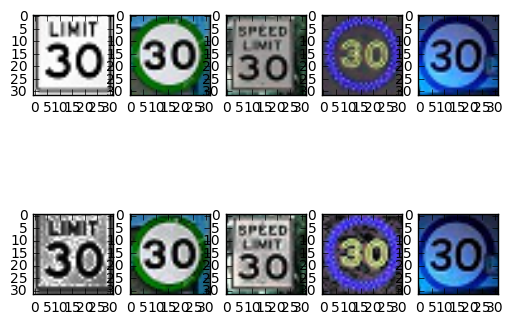

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Load images

# United States 30MPH centered
img1 = cv2.imread('30mph1.jpg')

# Green EU 30kph
img2 = cv2.imread('30mph2.jpg')

# United States 30MPH not centered
img3 = cv2.imread('30mph3.jpg')

# LED lights EU 30kph
img4 = cv2.imread('30mph4.jpg')

# Building painting of EU 30kph
img5 = cv2.imread('30mph5.jpg')

fig = plt.figure()
fig.subplots_adjust(hspace = 0.8)

ax1 = fig.add_subplot(251)
ax1.imshow(img1)
ax2 = fig.add_subplot(252)
ax2.imshow(img2)
ax3 = fig.add_subplot(253)
ax3.imshow(img3)
ax4 = fig.add_subplot(254)
ax4.imshow(img4)
ax5 = fig.add_subplot(255)
ax5.imshow(img5)

X_eval = np.empty([5,32,32,3], dtype = np.float32)

# Replace with a FOR loop over a dictionary for better code
image = imagePreProcess(img1, contrast_method = 'HSV')
ax6 = fig.add_subplot(256)
ax6.imshow(image)
X_eval[0] = imageNormalize(image)

image = imagePreProcess(img2, contrast_method = 'HSV')
ax7 = fig.add_subplot(257)
ax7.imshow(image)
X_eval[1] = imageNormalize(image)

image = imagePreProcess(img3, contrast_method = 'HSV')
ax8 = fig.add_subplot(258)
ax8.imshow(image)
X_eval[2] = imageNormalize(image)

image = imagePreProcess(img4, contrast_method = 'HSV')
ax9 = fig.add_subplot(259)
ax9.imshow(image)
X_eval[3] = imageNormalize(image)

image = imagePreProcess(img5, contrast_method = 'HSV')
ax10 = fig.add_subplot(2,5,10)
ax10.imshow(image)
X_eval[4] = imageNormalize(image)


y_eval = np.ones([5,], dtype = np.int32)
print('Done')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



I chose all of the images such that they should be categories as 30kph speed limit signs.  I chose them with various characteristics different than the standard EU sign with red border:

USA sign instead of EU (zoomed and centered)
USA sign instead of EU (whole sign with border)
EU sign with green ring
EU sign made of array of LED lights (wrong colors)
EU sign painted onto a building, partially blocked on the right

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

print('Running')
with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    result = sess.run(accuracy_operation, feed_dict={x:X_eval,y:y_eval,keep_prob:1.0})
    
    print('Accuracy on external images = {:3.1f}%'.format(100*result))
        
print('Done')

Running
Accuracy on external images = 0.0%
Done


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


The network is completely inept (0% accuracy) on the external images.  At the very least I was expecting the two EU versions of the sign, with the green and blue borders, to be identified correctly.  On the other hand, the test set accuracy was 93.7% with the final hyperparameters.

In [19]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

print('Running')
with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    softmax = tf.nn.softmax(logits)
    topK = tf.nn.top_k(softmax,k=5)
    result = sess.run(topK, feed_dict={x:X_eval, y:y_eval, keep_prob:1.0})
    print(result.values)
    print(result.indices)
        
print('Done')

Running
[[  8.60053658e-01   1.36031464e-01   1.01318292e-03   9.95196984e-04
    8.24994582e-04]
 [  9.97251809e-01   2.20104167e-03   3.22652893e-04   2.21328883e-04
    3.09763573e-06]
 [  9.60316896e-01   3.35216410e-02   4.05815616e-03   5.60044951e-04
    4.43022349e-04]
 [  8.99989128e-01   9.90086645e-02   1.00139540e-03   3.85950983e-07
    2.56839513e-07]
 [  7.23486245e-01   1.28149465e-01   1.26061991e-01   1.64318439e-02
    2.45191553e-03]]
[[ 3  6 32 42 35]
 [ 2  5  1  3 14]
 [11 40 30 18 33]
 [14 12 13 25 15]
 [38 40 12 18 37]]
Done


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

The model is very confident in its incorrect answers.  The highest probabilities for each image are 86.0%, 99.7%, 96.0%, 90.0% and 72.3%.  The only image that includes "Speed limit (30km/h) (1)" in the top 5 is the EU version of the sign with a different color on the border.

Twice the model predicts different speed limits (40km/h and 50km/h).  It also predicts a stop sign, right-of-way, and keep right.

These results are surprising.  Although the US signs not being classified should not be a surprise, as they are not truly part of the available classes, I was hoping to see them in the 30 km/h classification.  The other three images should all have been fairly easy to classify, but it seems the varying color schemes are breaking the prediction.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.